# Project Q3

Load tenure year - amount of time to repay the loan<br>
Number of dependent - number of people who are in your immediate family<br>
joint application - credit profiles of both you and the co-applicant are taken into account and both applicants are resposible for replaying the loan<br>
score - the higher the score, the better a borrower looks to potential lenders<br>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
file = pd.read_csv("Bank_CreditScoring.csv")
file

In [ ]:
file.columns

In [ ]:
number_creditCard = file["Number_of_Credit_Card_Facility"].mean()
print(number_creditCard)

side_income = file["Number_of_Side_Income"].max()
print(side_income)

median_score = file["Score"].median()
median_score

In [ ]:
file["Employment_Type"].value_counts().sort_index().plot(figsize = (10,4),kind = "bar",rot = 0)
plt.xlabel("Type of employment")
plt.ylabel("Frequency")
plt.title("Frequency of type of employment")


In [ ]:

boxplot = file.boxplot(by = "Employment_Type",column =['Total_Sum_of_Loan'],grid = False)

In [ ]:
file["Number_of_Dependents"].value_counts()


In [ ]:
check = file[['Total_Income_for_Join_Application','Decision']][file['Number_of_Dependents'] == 2]
check['Decision'].value_counts()

In [42]:
check = file[['Total_Income_for_Join_Application','Decision']][file['Number_of_Dependents'] == 3]
check['Decision'].value_counts()

1    296
0    104
Name: Decision, dtype: int64

In [ ]:
check = file[['Total_Income_for_Join_Application','Decision']][file['Number_of_Dependents'] == 4]
check['Decision'].value_counts()

In [ ]:
check = file[['Total_Income_for_Join_Application','Decision']][file['Number_of_Dependents'] == 6]
check['Decision'].value_counts()

In [ ]:
#add a column for result
file['binary_col'] = file['Decision'].apply(lambda x : 1 if x == 'Accept' else 0)  
file.groupby('binary_col').mean()

# **Clustering**

In [2]:
file = pd.read_csv("Bank_CreditScoring.csv")

In [3]:
from sklearn.cluster import KMeans 


X = file.drop('Score',axis = 1)
y = file['Score']#Classification need to be classes

X = pd.get_dummies(X,drop_first = True)
X
# ax = sns.relplot(x="Monthly_Salary", y="Total_Sum_of_Loan", hue="Decision", data=file)
# print(ax)

,Credit_Card_Exceed_Months,Loan_Amount,Loan_Tenure_Year,Credit_Card_More_Than_Months,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,...,State_N.Sembilan,State_P.Pinang,State_Penang,State_Pulau Penang,State_SWK,State_Sabah,State_Sarawak,State_Selangor,State_Trengganu,Decision_Reject
0,1,456509,16,1,2,5,2,2,1,1,...,0,0,0,0,0,0,0,0,0,1
1,1,605505,19,1,2,5,2,2,1,2,...,0,0,0,0,0,0,0,0,0,0
2,1,294133,19,1,2,5,2,2,1,3,...,0,0,0,0,0,0,0,0,0,1
3,1,490216,20,1,2,5,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,292728,14,1,2,5,2,2,1,2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,6,339461,15,2,3,15,2,2,5,2,...,0,0,0,0,0,0,0,0,0,1
2346,6,690944,13,2,3,15,2,2,5,2,...,0,0,0,0,0,0,0,0,0,0
2347,6,321921,13,2,3,15,2,2,5,2,...,0,0,0,0,0,0,0,0,0,0
2348,6,393555,14,2,3,15,2,2,5,2,...,0,0,0,0,0,0,0,0,0,1


In [32]:
from sklearn.preprocessing import normalize

# Your answer here...
data_scaled = normalize(X)# 0 - 1
data_scaled = pd.DataFrame(data_scaled,columns = X.columns)
data_scaled.head()

,Credit_Card_Exceed_Months,Loan_Amount,Loan_Tenure_Year,Credit_Card_More_Than_Months,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,...,State_N.Sembilan,State_P.Pinang,State_Penang,State_Pulau Penang,State_SWK,State_Sabah,State_Sarawak,State_Selangor,State_Trengganu,Decision_Reject
0,1.033260e-06,0.471693,0.000017,1.033260e-06,0.000002,0.000005,0.000002,0.000002,1.033260e-06,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001
1,9.339157e-07,0.565491,0.000018,9.339157e-07,0.000002,0.000005,0.000002,0.000002,9.339157e-07,0.000002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,1.624726e-06,0.477886,0.000031,1.624726e-06,0.000003,0.000008,0.000003,0.000003,1.624726e-06,0.000005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000002
3,1.375518e-06,0.674301,0.000028,1.375518e-06,0.000003,0.000007,0.000003,0.000003,1.375518e-06,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,1.207364e-06,0.353429,0.000017,1.207364e-06,0.000002,0.000006,0.000002,0.000002,1.207364e-06,0.000002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001


In [ ]:
pip install kneed

In [4]:
from kneed import KneeLocator

distortions = []#initial
for i in range(2,11):
    km = KMeans(
        n_clusters = i, init = 'random',
        n_init = 10,max_iter = 300,
        tol = 1e-04,random_state = 0
    )
    km.fit(X)
    distortions.append(km.inertia_)



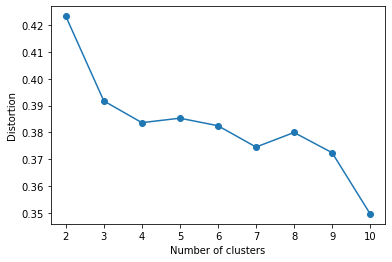

In [28]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    km = KMeans(n_clusters = k).fit(X)
    labels = km.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))
    
plt.plot(range(2,11),sil,marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

DBSCANimport pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

from sklearn.datasets import make_blobs

from yellowbrick.cluster import silhouette_visualizer

In [5]:
import pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

from sklearn.datasets import make_blobs

from yellowbrick.cluster import silhouette_visualizer

0       4
1       4
2       0
3       2
4       0
       ..
2345    1
2346    3
2347    0
2348    0
2349    1
Name: Score, Length: 2350, dtype: int32
      Credit_Card_Exceed_Months Employment_Type  Loan_Amount  \
0                             1        employer       456509   
1                             1        employer       605505   
2                             1        employer       294133   
3                             1        employer       490216   
4                             1        employer       292728   
...                         ...             ...          ...   
2345                          6  Fresh_Graduate       339461   
2346                          6  Fresh_Graduate       690944   
2347                          6  Fresh_Graduate       321921   
2348                          6  Fresh_Graduate       393555   
2349                          6  Fresh_Graduate       270677   

      Loan_Tenure_Year More_Than_One_Products  Credit_Card_More_Than_Months  \
0 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly_Salary', ylabel='Loan_Amount'>

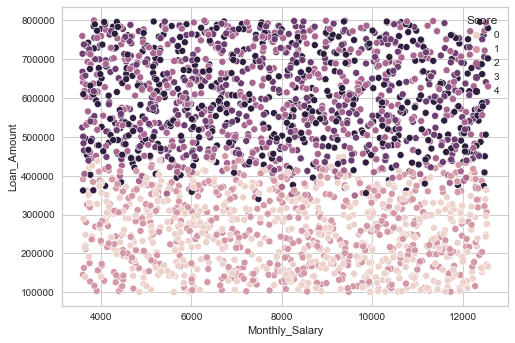

In [6]:
file = pd.read_csv("Bank_CreditScoring.csv")

X = file.drop('Score',axis = 1)
y = file['Score']

X = pd.get_dummies(X,drop_first = True)
X
from sklearn.preprocessing import normalize

# Your answer here...

# data_scaled = normalize(file)# 0 - 1
# data_scaled = pd.DataFrame(data_scaled,columns = file.columns)
# data_scaled.head()

from sklearn.cluster import KMeans
KM = KMeans(n_clusters = 5,random_state = 12)
KM.fit(X)
label = KM.predict(X)

file['Score']=label
print(file['Score'])
print(file)
sns.scatterplot(X['Monthly_Salary'], X['Loan_Amount'], hue=file['Score'])

In [18]:
kl = KneeLocator(range(2,11),distortions,curve = "convex",direction = "decreasing")
km = KMeans(n_clusters = kl.elbow, random_state=1)
km.fit(X)

file= file.drop("Score", axis=1)
file["Score"]=km.labels_
print(file['Score'])

# fig, axes = plt.subplots(1, 2, figsize=(13,6))

# sns.scatterplot(x="Monthly_Salary", y="Total_Income_for_Join_Application", hue="Score", data=file, ax=axes[0])
# sns.scatterplot(x="Monthly_Salary", y="Total_Income_for_Join_Application", hue="Score", data=df_new, ax=axes[1]

NameError: name 'KneeLocator' is not defined

# **Classification 1**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

In [53]:
file = pd.read_csv("Bank_CreditScoring.csv")

In [12]:
from sklearn.cluster import KMeans 
#file['Decision'] = np.where(file["Decision"] == "Accept", 1,0)
X = file.drop('Score',axis = 1)
y = file['Score'].apply(str)
X =  X.astype(str)

#X = pd.get_dummies(X,drop_first = True)
# X['Score']


      Credit_Card_Exceed_Months Employment_Type  Loan_Amount  \
0                             1        employer       456509   
1                             1        employer       605505   
2                             1        employer       294133   
3                             1        employer       490216   
4                             1        employer       292728   
...                         ...             ...          ...   
2345                          6  Fresh_Graduate       339461   
2346                          6  Fresh_Graduate       690944   
2347                          6  Fresh_Graduate       321921   
2348                          6  Fresh_Graduate       393555   
2349                          6  Fresh_Graduate       270677   

      Loan_Tenure_Year More_Than_One_Products  Credit_Card_More_Than_Months  \
0                   16                    yes                             1   
1                   19                     no                            

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [ ]:
# pip install category_encoders

In [ ]:
# import category_encoders as ce

# encoder = ce.OneHotEncoder(cols=['Employment_Type','More_Than_One_Products','Property_Type','State'])

# X_train = encoder.fit_transform(X_train)

# X_test = encoder.transform(X_test)

In [14]:
from sklearn.naive_bayes import GaussianNB

# Your answers here...
nb = GaussianNB()
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)
y_pred
nb.score(X_test, y_test)

ValueError: could not convert string to float: 'employer'

# **Classification 2**


In [63]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.get_params()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred

clf.score(X_test, y_test)

0.9801418439716312